# Creative Gaming: Uplift Modeling

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group 5
* Team member names:
    - Gaetan Rieben
    - Mohib Muhyuddin
    - Albara Altoukhi
    - Mohannad AlSaegh

## Setup

Please complete this python notebook with your group by answering the questions in `cg-uplift-mdsba.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the second group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:


![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
# run pip install --user pyrsm --upgrade to make sure you have the latest version
rsm.__version__

'0.9.18'

# Loading the data

In [3]:
## loading the organic data - this dataset must NOT be changed
cg_organic_control = pd.read_parquet("data/cg_organic_control.parquet").reset_index(drop=True)
cg_organic_control

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
1,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
2,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
3,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
4,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,10,2,0,14,0,105,0,no,no,0,0,0,0,no,no,11,2192,no,no
29996,no,9,7,0,163,2,83,5,no,no,0,0,0,0,yes,no,11,3743,yes,no
29997,no,10,15,0,1,1,59,9,no,no,3,0,0,0,yes,no,22,1858,yes,yes
29998,no,8,11,0,31,0,0,276,no,no,2,0,0,0,yes,no,19,1797,no,no


In [4]:
rsm.md("data/cg_organic_control_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")


In [5]:
## loading the random data - this dataset must NOT be changed
cg_ad_random = pd.read_parquet("data/cg_ad_random.parquet").reset_index(drop=True)
cg_ad_random

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,2,8,0,0,0,5,4,no,no,0,0,8,0,yes,no,3,1889,no,yes
1,no,5,15,0,179,0,50,362,yes,no,22,0,4,4,no,no,2,1308,yes,no
2,no,7,7,0,267,0,64,0,no,no,5,0,0,0,no,yes,1,3562,yes,no
3,no,4,4,0,36,0,0,0,no,no,0,0,0,0,no,no,2,2922,yes,no
4,no,8,17,0,222,10,63,20,yes,no,10,0,9,6,yes,no,4,2192,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,no,5,1,0,0,0,0,0,no,no,0,0,0,0,yes,yes,11,2374,no,no
29996,no,9,12,0,78,0,59,1,yes,no,16,0,0,5,yes,no,2,1978,yes,no
29997,no,9,19,1,271,0,71,95,yes,no,14,0,0,3,no,no,2,2831,yes,yes
29998,no,10,23,0,76,6,20,107,no,no,38,0,1,0,no,no,9,3197,yes,no


In [6]:
rsm.md("data/cg_ad_random_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Uplift Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")

In [7]:
## loading the treatment data - this dataset must NOT be changed
cg_ad_treatment = pd.read_parquet("data/cg_ad_treatment.parquet").reset_index(drop=True)
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,no,6,8,0,115,0,13,0,yes,no,...,0,0,4,no,no,11,2343,yes,no,1
149996,no,7,19,0,0,0,0,0,no,no,...,0,0,0,no,no,1,3166,yes,no,0
149997,no,1,5,0,207,0,37,10,yes,no,...,0,3,0,yes,yes,5,2619,yes,no,0
149998,no,7,19,1,0,0,88,0,no,no,...,0,1,4,no,no,9,2343,no,no,0


In [8]:
rsm.md("data/cg_ad_treatment_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* rnd_30k: Dummy variable that randomly selects 30K customers (1) and the remaining 90K (0)


In [9]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : cg_organic_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.018  -98.2%        -4.02      0.082  -48.956  < .001  ***
GameLevel         1.105   10.5%         0.10      0.011    9.102  < .001  ***
NumGameDays       1.032    3.2%         0.03      0.004    7.493  < .001  ***
NumGameDays4Plus  1.065    6.5%         0.06      0.006   11.159  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.036
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.651
Log-likelihood: -6315.137, AIC: 12638.275, BIC: 12671.511
Chi-squared: 465.178, df(3), p.value < 0.001 
Nr obs: 30,000


In [10]:
# load a custom python module
from utils.functions import example
example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



# Part I: Uplift Modeling Using Machine Learning

## 1. Prepare the data

### a.  Add a variable “ad” to cg_ad_random and set its value to 1 for all rows

In [11]:
# Add a variable “ad” to cg_ad_random and set its value to 1 for all rows
cg_ad_random["ad"] = 1

### b.  Add a variable “ad” to cg_organic_control and set its value to 0 for all rows

In [12]:
# Add a variable “ad” to cg_organic_control and set its value to 0 for all rows
cg_organic_control["ad"] = 0

### c.  Create a stacked dataset for the uplift analysis by combining cg_organic_control (Group 1) and cg_ad_random (Group 2). Use cg_rct_stacked as the name for the stacked dataset.

In [13]:
# stacked dataset 
cg_rct_stacked = pd.concat([cg_organic_control, cg_ad_random], axis=0).reset_index(drop=True)
cg_rct_stacked

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
59996,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
59997,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
59998,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


### d.  Create a training variable and ensure the proportion of "yes" and "no" values is as close as possible across the 4 sub-sets of data (i.e., training and test for ad == 0 and training and test for ad == 1). Use 1234 as the seed. Use “converted” and “ad” as the blocking variables, in that order. Hint: Review the uplift demo code for an example of how to set this up.

In [14]:
# Use 1234 as the seed
np.random.seed(1234)

In [15]:
# Create a training variable 
cg_rct_stacked["training"] = rsm.model.make_train(
    data=cg_rct_stacked, test_size=0.3, strat_var=["converted", "ad"]
)

### e.  Check if the probability of yes/no is similar across the training and test sets for ad == 0 and ad == 1. The response rate does not have to be exactly the same in the ad == 0 and ad == 1 sections of the data. However, within ad == 0, the ratio of yes/no should be very similar for the training and test sets. Similarly, within ad == 1, the ratio of yes/no should be very similar for the training and test set.

In [16]:
# Check the balance of the training variable
pd.crosstab(
    cg_rct_stacked.converted, [cg_rct_stacked.ad, cg_rct_stacked.training], normalize="columns"
).round(2)

ad            0           1      
training    0.0   1.0   0.0   1.0
converted                        
yes        0.06  0.06  0.13  0.13
no         0.94  0.94  0.87  0.87

In [17]:
pd.crosstab(cg_rct_stacked.ad, cg_rct_stacked.training)

training,0.0,1.0
ad,,
0,9000,21000
1,9000,21000


## 2.  Train an uplift model using Logistic Regression. Add the predicted scores for the treatment and control models, i.e., pred_control and pred_treatment, to cg_rct_stacked (or add them to a separate DataFrame called pred_store) and calculate the uplift score.

In [18]:
# Features
features = [
    'GameLevel', 'NumGameDays', 'NumGameDays4Plus',
    'NumInGameMessagesSent', 'NumSpaceHeroBadges',
    'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship',
    'AcquiredIonWeapon', 'TimesLostSpaceship', 'TimesKilled',
    'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall',
    'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole',
    'UserHasOldOS'
]

In [19]:
# Treatment logistic model
lr_treatment = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=features,
)
lr_treatment.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   

In [20]:
# Control logistic model
lr_control = rsm.model.logistic(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=features,
)
lr_treatment.summary()

Logistic regression (GLM)
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   

In [21]:
# logistic predictions control and treatment
cg_rct_stacked["pred_treatment_lr"] = lr_treatment.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_lr"] = lr_control.predict(cg_rct_stacked)["prediction"]

In [22]:
# Calculate the uplift
cg_rct_stacked["uplift_score_lr"] = (
    cg_rct_stacked.pred_treatment_lr - cg_rct_stacked.pred_control_lr
)

## 3.  Calculate the Uplift (%) and Incremental Uplift (%) for the uplift model (use 20 instead of the standard 10 groups) and plot performance metrics. Interpret the plots. 

Hint: Use functions from the pyrsm package to generate the uplift table (uplift_tab), 
the incremental uplift (inc_uplift_plot), and the uplift plot (uplift_plot).

In [23]:
tab_uplift_lr = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_lr", "ad", 1, qnt=20
)
tab_uplift_lr

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_lr,1,0.05,197,450,70,634,147.315457,1.636838,0.327368
1,uplift_score_lr,2,0.10,309,900,99,1182,233.619289,2.595770,0.195969
2,uplift_score_lr,3,0.15,428,1350,125,1686,327.911032,3.643456,0.212857
3,uplift_score_lr,4,0.20,528,1800,152,2175,402.206897,4.468966,0.167007
4,uplift_score_lr,5,0.25,594,2250,166,2684,454.842027,5.053800,0.119162
5,uplift_score_lr,6,0.30,642,2700,183,3150,485.142857,5.390476,0.070186
6,uplift_score_lr,7,0.35,681,3150,195,3658,513.080372,5.700893,0.063045
7,uplift_score_lr,8,0.40,719,3600,200,4127,544.539133,6.050435,0.073783
8,uplift_score_lr,9,0.45,756,4050,210,4577,570.179594,6.335329,0.060000
9,uplift_score_lr,10,0.50,791,4500,231,5076,586.212766,6.513475,0.035694


The table represents data segmented into bins, each corresponding to a 5% increment of the population targeted, based on their predicted uplift score. The columns T_resp and C_resp refer to the number of responses in the treatment and control groups, respectively, while T_n and C_n refer to the size of the treatment and control groups within each bin.

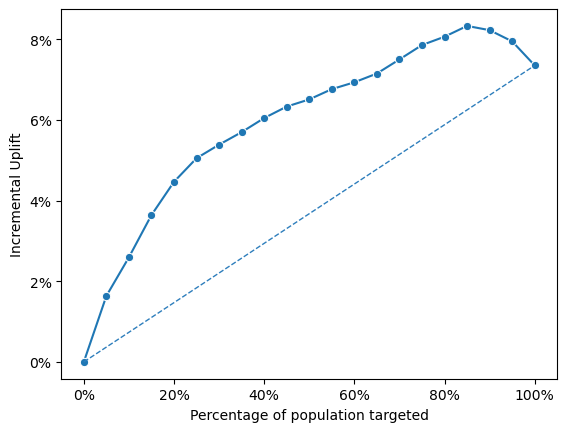

In [143]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_lr", "ad", 1, qnt=20
)

The plot represents the incremental uplift achieved by targeting different percentages of the population based on an uplift score calculated by a logistic regression model. Here's how to interpret the plot using the table generated in the previous step:

- At the **5% mark**, targeting the top 5% of the population, we see an incremental uplift of approximately **1.64%**. This suggests that the top 5% of customers identified by the logistic regression model are highly responsive to the treatment.

- As we increase the proportion of the population targeted to **20%**, the incremental uplift increases to about **4.47%**. This indicates that expanding the target to include the top 20% of customers continues to capture a responsive group that contributes to a higher incremental uplift.

- The incremental uplift continues to grow as more of the population is targeted, reaching its peak at the **80% mark**, with an incremental uplift of **8.07%**. This is the point of maximum efficiency, where targeting this percentage of the population yields the maximum gains in uplift seen until this point.

- Beyond this point, as we target up to **90% of the population**, the incremental uplift begins to decline, indicating that the additional segments of the population included are less responsive. At 90%, the incremental uplift slightly decreases to **8.23%**, and then more substantially to **7.35%** when the entire population is targeted.

- The plot shows a solid line representing the incremental uplift achieved at each bin and a dotted line that represent a baseline for comparison to random targeting approach.

- The **decrease in incremental uplift** at the 90% and 95% marks, with a more pronounced drop after targeting 100% of the population, suggests that including the least responsive customers (those ranked lowest by the model) dilutes the effectiveness of the treatment. It implies that targeting customers beyond the 80% threshold leads to diminishing and then negative returns in terms of incremental uplift.

In summary, the plot illustrates that while initially targeting more customers leads to an increase in incremental uplift, there is an optimal cutoff point (around 80% in this case) beyond which the additional value gained from targeting extra customers diminishes and eventually becomes negative. This analysis helps in deciding the optimal proportion of the population to target to maximize incremental uplift.

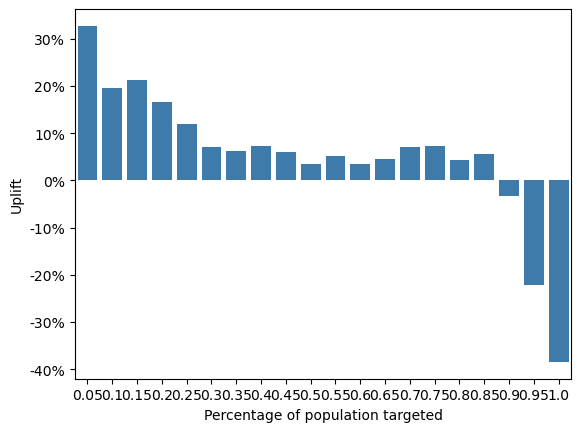

In [144]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_lr", "ad", 1, qnt=20
)

The bar plot represents the uplift percentage at various intervals of the population targeted, as determined by the uplift score from logistic regression. Each bar corresponds to a decile of the population targeted, with the height of the bar representing the uplift achieved at each respective decile.

1. **Initial Deciles (5-20%)**: The first two bars represent the highest uplift percentages, starting at nearly 30% for the top 5% of the population targeted. The uplift remains high but decreases as we target up to 20% of the population, which is in line with the incremental uplift values of 1.64% and 2.60% shown in the table.

2. **Decrease in Uplift (20-80%)**: As we move from targeting 20% to 80% of the population, the uplift percentages decrease. The bars get progressively shorter, indicating that each additional segment of the population targeted contributes less to the overall uplift. This is consistent with the table, where the incremental uplift peaks at around 6-7% when targeting up to 80% of the population.

3. **Maximum Gains (Around 80%)**: The highest uplift is found when targeting around 80% of the population, which corresponds to the peak uplift of 8.07% in the table. This indicates that targeting up to this point is optimal for maximizing uplift.

4. **Negative Uplift Beyond Optimal Point (Beyond 80%)**: The plot shows that as we target more than the optimal percentage of the population, the uplift turns negative. The last three bars on the plot dip below 0%, reflecting a detrimental impact when targeting these additional segments of the population. This corresponds to the negative uplift percentages of -0.03%, -0.22%, and -0.38% for targeting 90%, 95%, and 100% of the population, respectively, as shown in the table.

5. **Conclusions**: The plot clearly demonstrates the concept of diminishing returns in uplift modeling—the initial segments provide the highest uplift, and as more of the population is targeted, the marginal gain decreases and eventually becomes negative. The negative bars at the end emphasize the loss incurred from over-targeting, where the cost of targeting additional segments outweighs the benefits.

In conclusion, the plot, alongside the table data, underlines the importance of identifying the optimal cutoff for targeting to maximize uplift, showcasing that targeting beyond a certain point can lead to reduced or even negative returns.

## 4.  Using the incremental_resp column from the performance metric table created through the uplift_tab function, calculate the incremental profit you expect to make if you targeted the best 30,000 customers of 120,000 using the uplift model.
Hint: For every n-tile, the incremental_resp tells you how many incremental 
purchases were made when customers up to that n-tile were targeted. To extrapolate 
to the best 30,000 from 120,000, notice that there are a total of 9,000 customers who 
got the ad in cg_rct_stacked

In [26]:
pd.crosstab(cg_rct_stacked.ad, cg_rct_stacked.training)

training,0.0,1.0
ad,,
0,9000,21000
1,9000,21000


In [27]:
# margin and cost
margin = 14.99
cost = 1.5

# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_uplift_lr["incremental_resp"].iloc[4]
T_n = tab_uplift_lr["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_uplift_lr = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_uplift_lr:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $45907.76


## 5. Calculate the Uplift (%) and Incremental Uplift (%) you would get if you used a propensity model (use 20 instead of the standard 10 groups). Compare the performance metrics between the uplift and propensity models and interpret the differences. 
Hint: Use uplift and incremental uplift plots to compare the uplift and propensity models

In [28]:
tab_propensity_lr = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_lr", "ad", 1, qnt=20
)
tab_propensity_lr

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_lr,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment_lr,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment_lr,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment_lr,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment_lr,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment_lr,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment_lr,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment_lr,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment_lr,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment_lr,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


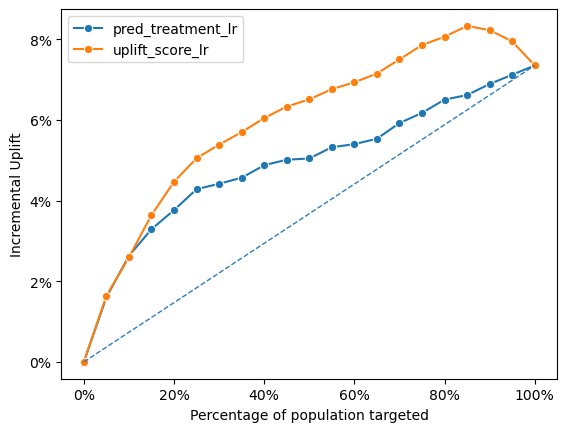

In [29]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_lr", "uplift_score_lr"], "ad", 1, qnt=20
)

The plot above displays two lines, each representing incremental uplift curves calculated from a logistic regression model: one for predicted treatment (blue line) and one for the uplift score (orange line). Using the tables generated previously, we can compare the two models.

**Predicted Treatment (Propensity) Logistic Regression Model (Blue Line):**

- **Starts Lower**: The propensity model starts with a lower uplift at the 5% population targeted mark (1.60% according to the table), suggesting that the most responsive individuals identified by this model contribute less to incremental uplift compared to the uplift model in the previous plot.
  
- **Steady Growth**: The incremental uplift increases steadily as more of the population is targeted, reaching its peak uplift (6.90%) at the 90% population mark. This peak is slightly lower than the uplift model from the previous plot, indicating that targeting the same proportion of the population would result in a slightly less effective campaign.

- **Plateau Before 100%**: The curve begins to plateau before reaching the full population, suggesting diminishing returns as more individuals are included. Unlike the previous uplift model, this model does not show a significant decrease in uplift when moving from 90% to 100% of the population.

**Comparison:**

- **Maximizing Incremental Uplift**: The uplift score model reaches a higher peak sooner (around 80% targeted), which might make it more suitable for campaigns where the goal is to maximize incremental uplift within a limited budget or scope.

- **Consistency of Response**: The propensity model shows a more gradual increase and a more consistent response as the targeted population grows. This might make it more suitable for campaigns where a broader reach is necessary, and the risk of a decline in incremental uplift is a concern.

- **Efficiency and Cost-effectiveness**: The uplift score model's early peak indicates that it may be more efficient and cost-effective, as it achieves higher uplift with a smaller segment of the population.

In conclusion, the uplift score model (orange line) seems to be more efficient for targeting a smaller, more responsive subset of the population, while the propensity model (blue line) offers a broader, more consistent reach without a sharp decline.

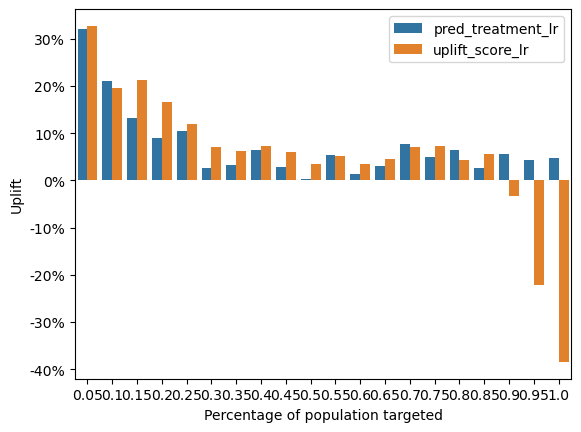

In [30]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_lr", "uplift_score_lr"], "ad", 1, qnt=20
)

**Propensity Model (Predicted Treatment Logistic Regression, Blue Bars):**

- **Initial Targeting (5%):** The propensity model shows an uplift of 0.320663, or approximately 32.07%, when targeting the top 5% of the population.
- **Expanding Targeting (10-20%):** As the targeting expands to include up to 20% of the population, the uplift percentages are 21.05% and 9.03%, respectively, showing a decrease in uplift as more of the population is targeted.
- **Diminishing Returns (25-80%):** Beyond the 20% mark, the uplift percentages continue to decrease, showing diminishing returns as a larger segment of the population is targeted. The uplift stabilizes around 6.51% when 80% of the population is targeted.
- **Over-Targeting (85-100%):** Targeting more than 80% of the population results in further diminishing returns, with uplift percentages slightly increasing before dropping to 7.35% when the entire population is targeted.

**Comparisons:** 

- **Efficiency in Initial Segments:** The uplift model appears to be more effective at identifying and targeting the most responsive individuals in the initial segments of the population (up to around 10-15% targeted).
- **Consistency Across Population:** The propensity model offers more consistent uplift percentages across a broader range of the population, with less volatility in the uplift as more of the population is targeted.
- **Optimal Targeting Range:** Both models demonstrate that there is an optimal range of the population to target for maximum uplift. However, the uplift model suggests that this optimal range is narrower, with higher uplifts initially but quicker diminishing returns as targeting expands.

In conclusion, the uplift model may be preferred when the goal is to maximize impact with a smaller, more precise target group.

## 6. Using the incremental_resp column from the uplift table for the propensity model, calculate the incremental profit you would expect to make if you targeted the best 30,000 customers of 120,000 using the propensity model. How much more do you expect to make from using an uplift rather than a propensity model?

In [31]:
# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_propensity_lr["incremental_resp"].iloc[4]
T_n = tab_propensity_lr["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_propensity_lr = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_propensity_lr:.2f}")

#How much more do you expect to make from using an uplift rather than a propensity model?
print(f"The additional incremental profit for using the uplift over the propensity is ${incremental_profit_uplift_lr - incremental_profit_propensity_lr:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $32065.48
The additional incremental profit for using the uplift over the propensity is $13842.28


## 7.  Repeat steps 2-6 using a Random Forest model. Tune the model on at least two hyper parameters 

### 7.2. Train Random Forest Models

In [32]:
# RF treatment model
rf_treatment = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=features,
)
rf_treatment.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.757

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship

In [33]:
max_features = ['auto', 'sqrt', 'log2', 0.5, 0.8]

n_estimators = [400, 600, 800]

param_grid = {'max_features': max_features,
              'n_estimators': n_estimators}

scoring = {'AUC': 'roc_auc'}

rf_cv = GridSearchCV(
rf_treatment.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=5
)

In [34]:
rf_cv.fit(rf_treatment.data_onehot, rf_treatment.data.converted)

In [35]:
pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

In [36]:
print(rf_cv.best_params_)
print(rf_cv.best_score_.round(3))

In [37]:
# RF treatment model
rf_treatment = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=features,
    max_features='log2',
    n_estimators=800,
)
rf_treatment.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : log2 (4)
n_estimators         : 800
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.774

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship

In [38]:
# RF control model
rf_control = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=features,
)
rf_control.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.844

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship

In [39]:
rf_cv = GridSearchCV(
rf_control.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=5
)

In [40]:
rf_cv.fit(rf_control.data_onehot, rf_control.data.converted)

In [41]:
pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

In [42]:
print(rf_cv.best_params_)
print(rf_cv.best_score_.round(3))

In [43]:
# RF control model
rf_control = rsm.model.rforest(
    data={"cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=features,
    max_features='sqrt',
    n_estimators=600,
)
rf_control.summary()

Random Forest
Data                 : cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 21,000
max_features         : sqrt (5)
n_estimators         : 600
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.868

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship

In [44]:
# logistic predictions control and treatment
cg_rct_stacked["pred_treatment_rf"] = rf_treatment.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control_rf"] = rf_control.predict(cg_rct_stacked)["prediction"]

In [45]:
# Calculate the uplift
cg_rct_stacked["uplift_score_rf"] = (
    cg_rct_stacked.pred_treatment_rf - cg_rct_stacked.pred_control_rf
)

### 7.3. Calculate Uplift and Incremental Uplift for the Uplift Random Forest Model with Plots

In [46]:
tab_uplift_rf = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)
tab_uplift_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_rf,1,0.05,208,449,53,608,168.860197,1.876224,0.376081
1,uplift_score_rf,2,0.10,351,898,90,1132,279.604240,3.106714,0.247875
2,uplift_score_rf,3,0.15,477,1349,119,1627,378.333128,4.203701,0.220793
3,uplift_score_rf,4,0.20,567,1800,148,2162,443.780759,4.930897,0.145351
4,uplift_score_rf,5,0.25,646,2250,182,2728,495.890029,5.509889,0.115485
5,uplift_score_rf,6,0.30,718,2697,210,3221,542.163303,6.024037,0.104279
6,uplift_score_rf,7,0.35,774,3149,228,3711,580.528698,6.450319,0.087159
7,uplift_score_rf,8,0.40,816,3595,232,4131,614.102154,6.823357,0.084647
8,uplift_score_rf,9,0.45,854,4046,243,4628,641.558773,7.128431,0.062124
9,uplift_score_rf,10,0.50,885,4500,257,5169,661.262333,7.347359,0.042404


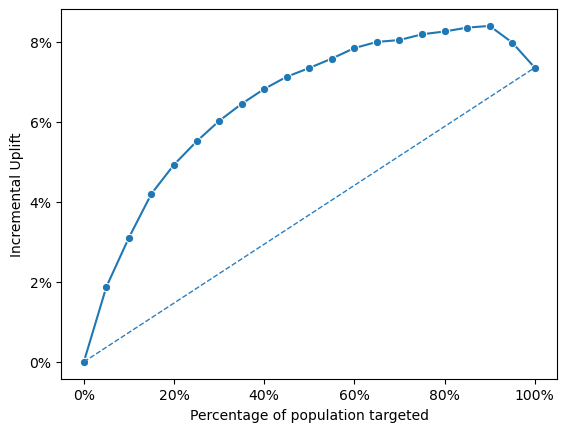

In [47]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)

The plot represents the incremental uplift achieved by targeting different percentages of the population based on an uplift score calculated by a random forest model. Here's how to interpret the plot using the table generated in the previous step:

- At the **5% mark**, targeting the top 5% of the population, we see an incremental uplift of approximately **1.87%**. This suggests that the top 5% of customers identified by the random forest model are highly responsive to the treatment.

- As we increase the proportion of the population targeted to **20%**, the incremental uplift increases to about **4.99%**. This indicates that expanding the target to include the top 20% of customers continues to capture a responsive group that contributes to a higher incremental uplift.

- The incremental uplift continues to grow as more of the population is targeted, reaching its peak at the **90% mark**, with an incremental uplift of **8.37%**. This is the point of maximum efficiency, where targeting this percentage of the population yields the highest incremental benefit.

- Beyond this optimal point, the incremental uplift slightly decreases to **7.99%**, and then more substantially to **7.35%** when the entire population is targeted.

- The plot shows a solid line representing the incremental uplift achieved at each bin and a dotted line that represent a baseline for comparison to random targeting approach.

- The **decrease in incremental uplift** at the 90% and 95% marks, with a more pronounced drop after targeting 100% of the population, suggests that including the least responsive customers (those ranked lowest by the model) dilutes the effectiveness of the treatment. It implies that targeting customers beyond the 90% threshold leads to diminishing and then negative returns in terms of incremental uplift.

In summary, the plot illustrates that while initially targeting more customers leads to an increase in incremental uplift, there is an optimal cutoff point (around 90% in this case) beyond which the additional value gained from targeting extra customers diminishes and eventually becomes negative. This analysis helps in deciding the optimal proportion of the population to target to maximize incremental uplift.

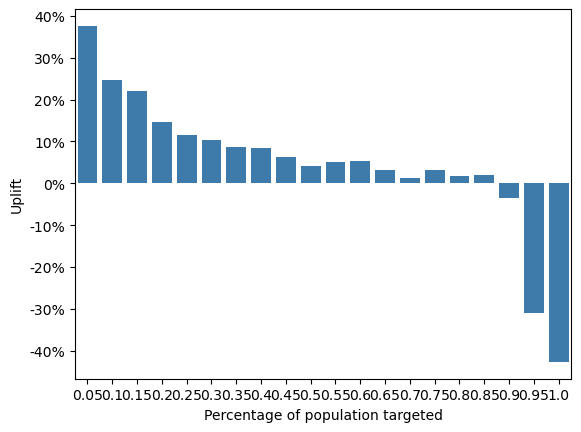

In [48]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_rf", "ad", 1, qnt=20
)

The bar plot represents the uplift percentage at various intervals of the population targeted, as determined by the uplift score from logistic regression. Each bar corresponds to a decile of the population targeted, with the height of the bar representing the uplift achieved at each respective decile.

1. **Initial Deciles (5-20%)**: The first two bars represent the highest uplift percentages, starting at nearly 40% for the top 5% of the population targeted. The uplift remains high but decreases as we target up to 20% of the population, almost divided by two compared to the first 5% of the treatment group.

2. **Decrease in Uplift (20-90%)**: As we move from targeting 20% to 80% of the population, the uplift percentages decrease. The bars get progressively shorter, indicating that each additional segment of the population targeted contributes less to the overall uplift. 

3. **Negative Uplift Beyond Optimal Point (Beyond 90%)**: The plot shows that as we target more than the optimal percentage of the population, the uplift turns negative. The last three bars on the plot dip below 0%, reflecting a detrimental impact when targeting these additional segments of the population. This corresponds to the negative uplift percentages of -4.5%, -30.37%, and -41.39% for targeting 90%, 95%, and 100% of the population, respectively, as shown in the table.

5. **Conclusions**: The plot clearly demonstrates the concept of diminishing returns in uplift modeling—the initial segments provide the highest uplift, and as more of the population is targeted, the marginal gain decreases and eventually becomes negative. The negative bars at the end emphasize the loss incurred from over-targeting, where the cost of targeting additional segments outweighs the benefits.

In conclusion, the plot, alongside the table data, underlines the importance of identifying the optimal cutoff for targeting to maximize uplift, showcasing that targeting beyond a certain point can lead to reduced or even negative returns.

### 7.4. Calculate Incremental Profit for the Best 30,000 Customers Using Uplift Random Forest Model

In [49]:
# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_uplift_rf["incremental_resp"].iloc[4]
T_n = tab_uplift_rf["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_uplift_rf = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_uplift_rf:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $54111.89


### 7.5. Calculate Uplift and Incremental Uplift for the Propensity Random Forest Model with Plots

In [50]:
tab_propensity_rf = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_rf", "ad", 1, qnt=20
)
tab_propensity_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_rf,1,0.05,211,446,76,604,154.880795,1.720898,0.347266
1,pred_treatment_rf,2,0.10,350,899,126,1103,247.303717,2.747819,0.206643
2,pred_treatment_rf,3,0.15,489,1349,178,1534,332.466754,3.694075,0.188239
3,pred_treatment_rf,4,0.20,597,1785,221,1982,397.966196,4.421847,0.151724
4,pred_treatment_rf,5,0.25,697,2233,264,2431,454.502262,5.050025,0.127446
5,pred_treatment_rf,6,0.30,771,2690,314,2869,476.590798,5.295453,0.047770
6,pred_treatment_rf,7,0.35,832,3141,357,3344,496.671950,5.518577,0.044729
7,pred_treatment_rf,8,0.40,893,3597,404,3749,505.379835,5.615331,0.017723
8,pred_treatment_rf,9,0.45,939,4025,429,4143,522.218682,5.802430,0.044025
9,pred_treatment_rf,10,0.50,987,4474,462,4525,530.207072,5.891190,0.020517


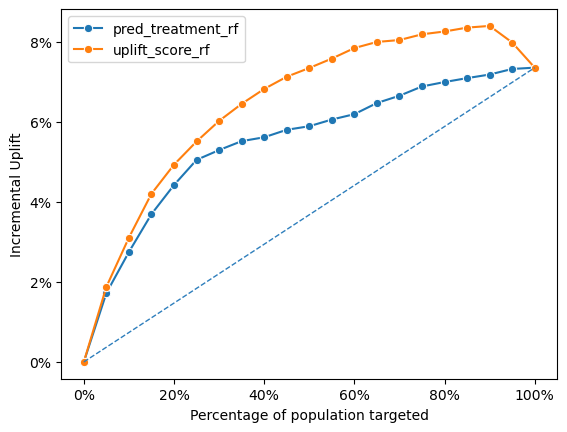

In [51]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_rf", "uplift_score_rf"], "ad", 1, qnt=20
)

The plot above displays two lines, each representing incremental uplift curves calculated from a random forest model: one for predicted treatment (blue line) and one for the uplift score (orange line). Using the tables generated previously, we can compare the two models.

**Predicted Treatment (Propensity) Random Forest Model (Blue Line):**

- **Starts Lower**: The propensity model starts with a slightly lower uplift at the 5% population targeted mark (1.74% according to the table), suggesting that the most responsive individuals identified by this model contribute less to incremental uplift compared to the uplift model in the previous plot.
  
- **Steady Growth**: The incremental uplift increases steadily as more of the population is targeted, reaching its lowest growth  uplift at the 30% population mark, with an uplift of 5.37. Then, the uplift increase at a slow pace until we reach a full population target. 

- **Plateau Before 100%**: The curve begins to plateau before reaching the full population, suggesting diminishing returns as more individuals are included. Unlike the previous uplift model, this model does not show a significant decrease in uplift when moving from 30% to 100% of the population.

**Comparison:**

- **Maximizing Incremental Uplift**: The uplift score model reaches a higher peak sooner (around 80% targeted), which might make it more suitable for campaigns where the goal is to maximize incremental uplift within a limited budget or scope.

- **Consistency of Response**: The propensity model shows a more gradual increase and a more consistent response as the targeted population grows. This might make it more suitable for campaigns where a broader reach is necessary, and the risk of a decline in incremental uplift is a concern.

- **Efficiency and Cost-effectiveness**: The uplift score model's early peak indicates that it may be more efficient and cost-effective, as it achieves higher uplift with a smaller segment of the population.

In conclusion, the uplift score model (orange line) seems to be more efficient for targeting a smaller, more responsive subset of the population, while the propensity model (blue line) offers a broader, more consistent reach without a sharp decline. The choice between the two would depend on the campaign's specific goals and constraints.

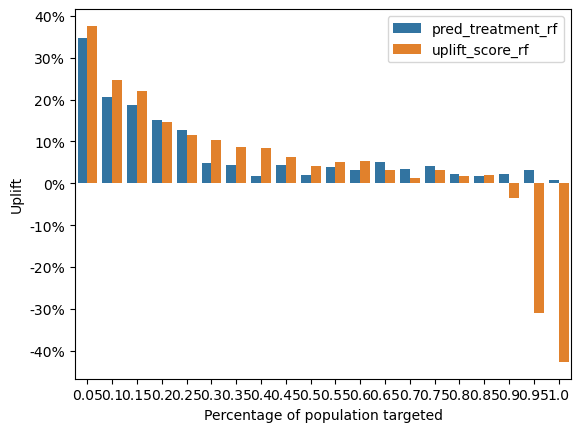

In [52]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_rf", "uplift_score_rf"], "ad", 1, qnt=20
)

**Propensity Model (Predicted Treatment Random Forest, Blue Bars):**

- **Initial Targeting (5%):** The propensity model shows an uplift of 34.98%, when targeting the top 5% of the population.
- **Expanding Targeting (10-20%):** As the targeting expands to include up to 20% of the population, the uplift percentages are 23.99% and 18.22%, respectively, showing a decrease in uplift as more of the population is targeted.

- **Diminishing Returns (20-35%):** Beyond the 20% mark, the uplift percentages continue to decrease, showing diminishing returns as a larger segment of the population is targeted. The uplift stabilizes around 3% when 35% of the population is targeted.
- **Over-Targeting (35-100%):** Targeting more than 35% of the population results in further diminishing returns,with up-and-down on the path, with uplift percentages slightly increasing before dropping to 1.31% when the entire population is targeted.

**Comparisons:**

- **Efficiency in Initial Segments:** The uplift model appears to be more effective at identifying and targeting the most responsive individuals in the initial segments of the population (up to around 10-15% targeted).
- **Consistency Across Population:** The propensity model offers more consistent uplift percentages across a broader range of the population, with less volatility in the uplift as more of the population is targeted.
- **Optimal Targeting Range:** Both models demonstrate that there is an optimal range of the population to target for maximum uplift. However, the uplift model suggests that this optimal range is narrower, with higher uplifts initially but quicker diminishing returns as targeting expands.

In conclusion, the uplift model may be preferred when the goal is to maximize impact with a smaller, more precise target group.

### 7.6. Calculate Incremental Profit for the Best 30,000 Customers Using Propensity Random Forest Model

In [53]:
# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_propensity_rf["incremental_resp"].iloc[4]
T_n = tab_propensity_rf["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_propensity_rf = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_propensity_rf:.2f}")

#How much more do you expect to make from using an uplift rather than a propensity model?
print(f"The additional incremental profit for using the uplift over the propensity is ${incremental_profit_uplift_rf - incremental_profit_propensity_rf:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $46531.42
The additional incremental profit for using the uplift over the propensity is $7580.46


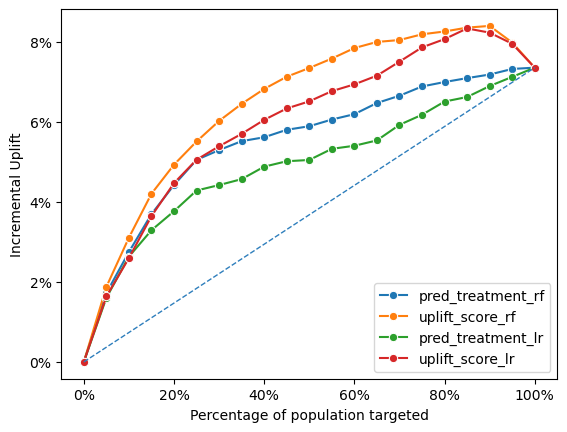

In [54]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_rf", "uplift_score_rf", "pred_treatment_lr", "uplift_score_lr"], "ad", 1, qnt=20
)

## 8. Repeat steps 2-6 using an XGBoost model. Tune the model on at least 3 hyper parameters. Do not use “early stopping” (10 points) 
Note: Check the documentation (and use ChatGPT) for suggestions on which hyperparameters to select. 
https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html

### 8.2. Train XGBoost Models

In [55]:
import xgboost as xgb

In [56]:
train_treatment = cg_rct_stacked.copy()
train_control = cg_rct_stacked.copy()

train_treatment = train_treatment[(train_treatment['training'] == 1) & (train_treatment['ad'] == 1)]
train_control = train_control[(train_control['training'] == 1) & (train_control['ad'] == 0)]

In [57]:
# Define features X and target y
Xt = pd.get_dummies(train_treatment[features], drop_first=True)
yt = (train_treatment['converted'] == 'yes').astype(int)  # Convert 'converted' to binary

# Convert the data into DMatrix
dtrain = xgb.DMatrix(Xt, label=yt)

In [58]:
from sklearn.model_selection import GridSearchCV

# Define a scikit-learn compatible XGBoost model
xgb_model_t = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Define the hyperparameter grid to search
param_grid = {
    'min_child_weight': [5, 7, 10],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
#    'n_estimators': [100, 300, 500, 700, 800],
    'gamma': [0.5, 1, 1.5],
#    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.3, 0.6, 1]
}

# Define the scorer for evaluating the models
scorer = 'roc_auc'

# Set up the grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model_t, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

# Since X and y are already defined and preprocessed, we can directly fit the grid search
grid_search.fit(Xt, yt)

# Extract the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


({'colsample_bytree': 1,
  'gamma': 1.5,
  'learning_rate': 0.1,
  'max_depth': 7,
  'min_child_weight': 10},
 0.7821783366561652)

In [96]:
best_model_t = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='auc', 
    colsample_bytree= 1,
    gamma= 1.5,
    learning_rate= 0.1,
    max_depth= 7,
    min_child_weight= 10
)
best_model_t.fit(Xt, yt)  # Fit the model to the entire dataset for this demonstration

# Predict the response variable for the entire dataset
# Convert the entire dataset's features into DMatrix for prediction
X_full = pd.get_dummies(cg_rct_stacked[features], drop_first=True)
dtest = xgb.DMatrix(X_full)

# Predict probabilities ([:,1] selects the probability for class 1)
predictions = best_model_t.predict_proba(X_full)[:, 1]

# Add the predictions to the original dataframe
cg_rct_stacked['pred_treatment_xgb'] = predictions

cg_rct_stacked[['pred_treatment_xgb']].head()  # Display the first few rows to verify the predictions column

,pred_treatment_xgb
0,0.008778
1,0.168860
2,0.030670
3,0.090391
4,0.266579


In [97]:
# Define features X and target y
Xc = pd.get_dummies(train_control[features], drop_first=True)
yc = (train_control['converted'] == 'yes').astype(int)  # Convert 'converted' to binary

# Convert the data into DMatrix
dtrain = xgb.DMatrix(Xc, label=yc)

In [140]:
from sklearn.model_selection import GridSearchCV

# Define a scikit-learn compatible XGBoost model
xgb_model_c = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Define the hyperparameter grid to search
param_grid = {
    'min_child_weight': [3, 5, 7],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
#    'n_estimators': [100, 300, 500, 700, 800],
    'gamma': [0.5, 1, 1.5],
#    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.3, 0.6, 1]
}

# Define the scorer for evaluating the models
scorer = 'roc_auc'

# Set up the grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model_c, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

# Since X and y are already defined and preprocessed, we can directly fit the grid search
grid_search.fit(Xc, yc)

# Extract the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


({'colsample_bytree': 1,
  'gamma': 1.5,
  'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 7},
 0.8843268143561627)

In [99]:
best_model_c = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='auc', 
    colsample_bytree= 1,
    gamma= 1.5,
    learning_rate= 0.1,
    max_depth= 4,
    min_child_weight= 7
)
best_model_c.fit(Xc, yc)  # Fit the model to the entire dataset for this demonstration

# Predict the response variable for the entire dataset
# Convert the entire dataset's features into DMatrix for prediction
X_full = pd.get_dummies(cg_rct_stacked[features], drop_first=True)
dtest = xgb.DMatrix(X_full)

# Predict probabilities ([:,1] selects the probability for class 1)
predictions = best_model_c.predict_proba(X_full)[:, 1]

# Add the predictions to the original dataframe
cg_rct_stacked['pred_control_xgb'] = predictions

cg_rct_stacked[['pred_control_xgb']].head()  # Display the first few rows to verify the predictions column

,pred_control_xgb
0,0.003239
1,0.027026
2,0.004098
3,0.015063
4,0.040946


In [100]:
# Calculate the uplift
cg_rct_stacked["uplift_score_xgb"] = (
    cg_rct_stacked.pred_treatment_xgb - cg_rct_stacked.pred_control_xgb
)

### 8.3. Calculate Uplift and Incremental Uplift for the Uplift XGBoost Model with Plots

In [101]:
tab_uplift_xgb = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)
tab_uplift_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score_xgb,1,0.05,214,450,76,626,159.367412,1.770749,0.354150
1,uplift_score_xgb,2,0.10,358,900,118,1172,267.385666,2.970952,0.243077
2,uplift_score_xgb,3,0.15,485,1350,139,1616,368.879950,4.098666,0.234925
3,uplift_score_xgb,4,0.20,595,1800,170,2142,452.142857,5.023810,0.185509
4,uplift_score_xgb,5,0.25,667,2250,191,2651,504.891362,5.609904,0.118743
5,uplift_score_xgb,6,0.30,739,2700,204,3217,567.784582,6.308718,0.137032
6,uplift_score_xgb,7,0.35,794,3150,223,3775,607.920530,6.754673,0.088172
7,uplift_score_xgb,8,0.40,851,3600,235,4279,653.290255,7.258781,0.102857
8,uplift_score_xgb,9,0.45,882,4050,250,4786,670.445466,7.449394,0.039303
9,uplift_score_xgb,10,0.50,918,4500,261,5278,695.472527,7.727473,0.057642


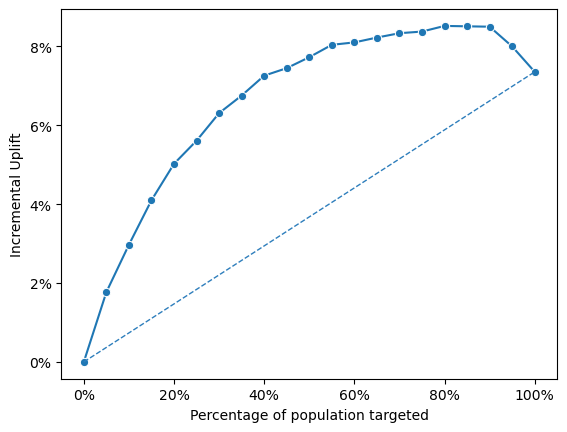

In [102]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)

The above plot illustrates the incremental uplift percentage achieved at each decile of the population targeted, based on an uplift model using XGBoost. here's how to understand the plot:

1. **Strong Start with "Persuadables" (5%-20%)**: The plot shows a rapid increase in incremental uplift from the first decile to the fourth, starting at 1.77% and rising to a peak of 5.02% when 20% of the population is targeted. This suggests that the model is effectively identifying "persuadables" at the beginning, who are the individuals most likely to be positively influenced by the treatment and were unlikely to convert without it.

2. **Continued Growth (25%-50%)**: Incremental uplift continues to grow, although at a slower rate, reaching 5.61% at 25% and 7.73% at 50%. The model is still identifying a significant number of "persuadables," but as more of the population is included, the proportion of highly responsive individuals decreases, leading to the observed gradual decline in the rate of uplift.

3. **Peak and Plateau (55%-80%)**: The uplift hits a high point between the 55% and 60% segments, with an incremental uplift of 8.10%. Beyond this peak, the uplift starts to plateau, indicating that the model is beginning to reach the limits of the "persuadable" population.

4. **Decline in Uplift (85%-100%)**: After targeting 80% of the population, the incremental uplift begins to decline, dipping to 8.51% at 80% and then decreasing to 7.36% at 100%. This decline suggests that the model is starting to include individuals who are less likely to be influenced by the treatment, such as "sure things" (those who would have converted regardless of the treatment) and potentially "do-not-disturbs" (those who may react negatively to the treatment).

The plot demonstrates why the uplift model is valuable:

- **Identifies "Persuadables"**: The model focuses on maximizing incremental uplift by identifying the "persuadables," ensuring that marketing efforts are directed toward those most likely to be influenced.

- **Avoids "Sure Things" and "Do-Not-Disturbs"**: By targeting based on uplift scores, resources are not wasted on "sure things," and efforts are made to minimize the inclusion of "do-not-disturbs."

- **Efficient Resource Allocation**: The peak of the uplift curve indicates the optimal point for targeting, after which the benefits of targeting additional customers diminish. This helps in allocating resources efficiently to maximize the return on investment.

The plot clearly shows that targeting up to a certain percentage of the population based on the uplift model can optimize marketing efforts and budget. However, it also highlights the importance of not over-targeting to avoid diminishing returns and potential negative impacts.

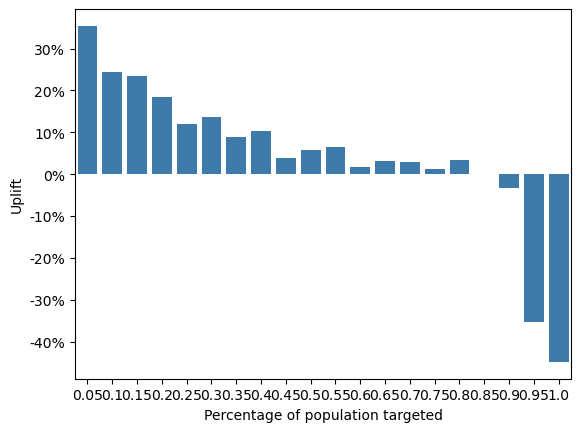

In [103]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_score_xgb", "ad", 1, qnt=20
)

The above plot can be interpreted as follows:

1. **High Uplift in Early Deciles (5%-20%)**: The plot starts with a high uplift of approximately 35% when targeting the top 5% of the population. This likely indicates that the XGBoost model has successfully identified the "persuadables" who are significantly impacted by the treatment. The uplift remains high but declines as more of the population is targeted, reaching about 24% at 10% of the population and around 18% at 20% of the population targeted.

2. **Gradual Decline (25%-50%)**: There is a gradual decline in the uplift as more of the population is targeted. This suggests that while the model is still identifying "persuadables," the proportion of highly responsive individuals is decreasing. The uplift reduces to around 12% at 25% targeted and approximately 6% at 50% targeted.

3. **Plateau and Decline (55%-100%)**: Between 55% and 80% of the population targeted, the uplift gradually plateaus, indicating that most of the "persuadables" have been targeted, and further inclusion of individuals does not significantly increase the overall uplift. Beyond 80%, the uplift declines, turning negative after the 85% threshold, dropping to about -35% at 95% and -45% at 100% targeted. This negative uplift suggests that targeting these segments of the population includes individuals who are less likely to be influenced by the treatment or may have an adverse reaction to it (i.e., "do-not-disturbs" or "lost causes").

**Implications of the XGBoost Uplift Model:**

- **Effective Targeting of "Persuadables"**: The XGBoost model is initially very effective at identifying and targeting the "persuadables," as evidenced by the high uplift percentages in the early deciles.

- **Avoidance of "Sure Things"**: The model's ability to maintain a positive uplift up to the 80% mark suggests it is effective at not targeting "sure things" – those who would have converted regardless of any intervention.

- **Recognition of Diminishing Returns**: The model shows diminishing returns as more of the population is targeted, which is crucial for campaign managers to recognize. It helps in determining the optimal cut-off point for targeting to maximize the campaign's impact.

- **Negative Consequences of Over-Targeting**: The steep drop into negative uplift percentages indicates the consequences of over-targeting. The model includes individuals who are either not influenced by the treatment or could have a negative response, demonstrating the importance of stopping targeting before reaching these groups.

In summary, the plot demonstrates that the XGBoost uplift model is initially successful at targeting the "persuadables," but there is a clear point of diminishing returns. The model's strength lies in maximizing uplift within the optimal targeting range and highlights the need for strategic decision-making regarding when to stop further targeting to avoid negative campaign outcomes.

### 8.4. Calculate Incremental Profit for the Best 30,000 Customers Using Uplift XGBoost Model

In [104]:
# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_uplift_xgb["incremental_resp"].iloc[4]
T_n = tab_uplift_xgb["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_uplift_xgb = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_uplift_xgb:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $55910.95


### 8.5. Calculate Uplift and Incremental Uplift for the Propensity XGBoost Model with Plots

In [105]:
tab_propensity_xgb = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment_xgb", "ad", 1, qnt=20
)
tab_propensity_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment_xgb,1,0.05,212,450,85,600,148.250000,1.647222,0.329444
1,pred_treatment_xgb,2,0.10,369,900,136,1074,255.033520,2.833706,0.241294
2,pred_treatment_xgb,3,0.15,502,1350,190,1555,337.048232,3.744980,0.183289
3,pred_treatment_xgb,4,0.20,607,1800,224,2000,405.400000,4.504444,0.156929
4,pred_treatment_xgb,5,0.25,690,2250,274,2447,438.058848,4.867321,0.072588
5,pred_treatment_xgb,6,0.30,760,2700,319,2885,461.455806,5.127287,0.052816
6,pred_treatment_xgb,7,0.35,830,3150,359,3291,486.381039,5.404234,0.057033
7,pred_treatment_xgb,8,0.40,891,3600,399,3755,508.470040,5.649667,0.049349
8,pred_treatment_xgb,9,0.45,951,4050,433,4171,530.561256,5.895125,0.051603
9,pred_treatment_xgb,10,0.50,990,4500,456,4594,543.330431,6.037005,0.032293


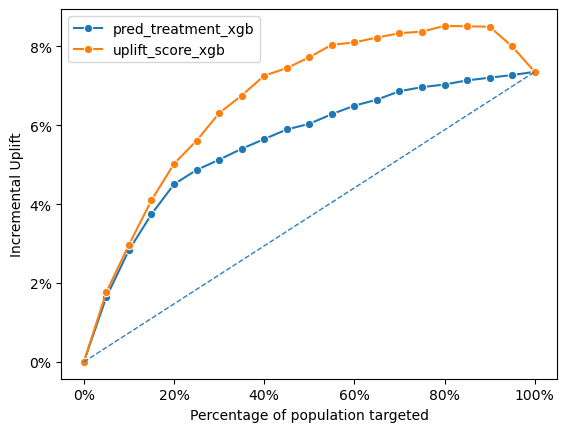

In [106]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_xgb", "uplift_score_xgb"], "ad", 1, qnt=20
)

Interpreting the plot:

**Propensity Model with XGBoost (Blue Line):**

- **Starting Uplift (5%)**: The propensity model begins with an uplift of 1.65% when targeting the top 5% of the population. This is a strong start, but it's slightly lower than the uplift model's starting point in the previous interpretation.
  
- **Uplift Growth (10%-50%)**: The uplift increases to 2.83% when targeting the top 10% and continues to grow, reaching 6.04% at 50% of the population targeted. The growth rate is substantial, indicating effective identification of "persuadables."

- **Peak and Plateau (55%-80%)**: The incremental uplift peaks at around 6.50% for the 60% population targeted, after which the growth slows down, and the curve starts to plateau, suggesting most "persuadables" have been targeted by this point.

- **Stabilization and Slight Increase (85%-100%)**: Unlike the uplift model, the propensity model shows a stabilization and a slight increase in uplift after the 80% mark, reaching 7.36% when the entire population is targeted.

**Differences Between Propensity and Uplift Models:**

- **Early Efficiency**: The uplift model (orange line) starts with a higher efficiency, identifying the most responsive "persuadables" at the beginning, which is why the initial uplift is higher compared to the propensity model.

- **Targeting "Sure Things"**: The propensity model includes not just "persuadables" but also "sure things," which may contribute to its more gradual increase in incremental uplift compared to the uplift model. "Sure things" are individuals who would have converted regardless of the intervention.

- **Diminishing Returns**: The uplift model shows diminishing returns more clearly as the percentage of the population targeted increases, which indicates a more precise targeting of "persuadables." The propensity model's curve is more gradual, suggesting a broader targeting that includes less responsive individuals.

- **Negative Uplift at High Targeting Levels**: The negative uplift observed with the uplift model when over-targeting (beyond 80%) is not as pronounced with the propensity model. This indicates that the propensity model might be less susceptible to including "do-not-disturbs" or "lost causes" but at the cost of also targeting "sure things."

**Why the Uplift Model is Better Than the Propensity Model:**

- **Focused Targeting**: The uplift model is better suited for campaigns focused on maximizing incremental gains because it specifically targets "persuadables" without expending resources on "sure things."

- **Resource Allocation**: The uplift model ensures that marketing efforts and budgets are allocated to segments of the population most likely to yield a positive incremental response, making it more cost-effective.

- **Avoidance of Over-Targeting**: The uplift model helps to avoid over-targeting, which can lead to negative uplift and wasted resources, by showing a clear indication of when additional targeting becomes counterproductive.

In summary, while both models provide valuable insights, the uplift model is generally better for optimizing marketing strategies focused on incremental gains because it more effectively identifies and targets the "persuadables" and provides a clearer guide for when to stop targeting to avoid negative returns.

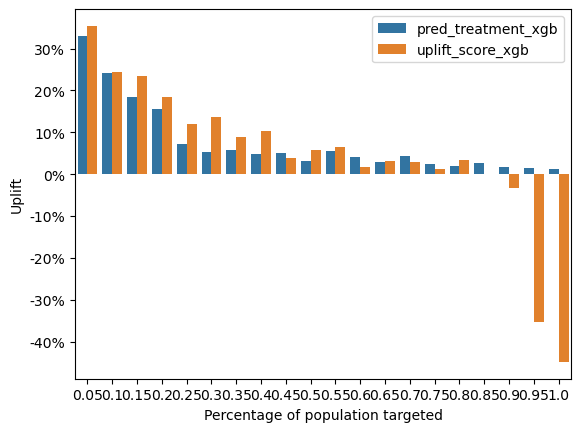

In [107]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["pred_treatment_xgb", "uplift_score_xgb"], "ad", 1, qnt=20
)

The **propensity model** (blue line) is designed to predict the likelihood that any given customer will take the desired action, such as making a purchase. It does not differentiate between those who are influenced by the treatment and those who would have converted regardless. This can lead to targeting customers who are "sure things," which is inefficient for an uplift campaign where the objective is to change behavior.

**Interpretation for Propensity Model Uplif Plot (Blue Line):**

- **Initial Uplift**: At the 5% targeted mark, the model achieves an uplift of approximately 32.94%, which is a strong start, likely identifying a mix of "persuadables" and "sure things."
- **Decreasing Uplift**: The uplift decreases as more of the population is targeted, from 24.13% at 10% to 1.35% at 100% targeted. This decline suggests that as we move through the population, the proportion of "persuadables" decreases, and the "sure things" have less impact on uplift.
- **Stabilization**: The uplift stabilizes at a low positive percentage beyond the 70% mark, showing that the model continues to target a mixture of "persuadables" and "sure things," but with diminishing effectiveness.

The **uplift model** (orange line) focuses solely on the incremental impact of the treatment, which means it aims to identify the "persuadables" only. It does not waste resources on "sure things" who would have converted without any intervention and avoids "do-not-disturbs" who may react negatively to the treatment.

**Comparison:**

- **High Efficiency for "Persuadables"**: The uplift model is initially more efficient in identifying "persuadables," demonstrated by the higher uplift percentages at lower targeting levels compared to the propensity model.
- **Avoids "Sure Things"**: The uplift model's sharper decline in uplift as the targeting level increases suggests it is successful in avoiding "sure things," focusing the campaign budget on those who are most likely to be influenced by the treatment.
- **Negative Uplift at High Targeting Levels**: The negative uplift at high targeting levels for the uplift model indicates that it has effectively saturated the pool of "persuadables" and is starting to reach "do-not-disturbs." This is valuable information as it provides a clear signal when to stop further targeting.
- **Resource Allocation**: The uplift model ensures that marketing efforts are allocated to segments of the population most likely to yield a positive incremental response, which is more cost-effective and maximizes the return on investment.

In summary, while the propensity model shows a more gradual decline in uplift and a lower negative impact at high targeting levels, the uplift model is superior for targeted marketing campaigns because it focuses on maximizing the incremental effect of the treatment. It achieves higher uplift percentages early on and provides a clearer cutoff point for targeting, beyond which the campaign is no longer effective.

### 8.6. Calculate Incremental Profit for the Best 30,000 Customers Using Propensity XGBoost Model

In [108]:
# get the value of incremental_resp for the 25th percentile
incremental_resp = tab_propensity_xgb["incremental_resp"].iloc[4]
T_n = tab_propensity_xgb["T_n"].iloc[4]

# calculate the incremental profit for the best 30,000 customers out of 120,000 by extrapolating the incremental_resp of 2250 out of 9000
incremental_profit_propensity_xgb = (incremental_resp / T_n) * 30000 * margin - 30000 * cost

# print a sentence with the result
print(f"The incremental profit for the best 30,000 customers out of 120,000 is ${incremental_profit_propensity_xgb:.2f}")

#How much more do you expect to make from using an uplift rather than a propensity model?
print(f"The additional incremental profit for using the uplift over the propensity is ${incremental_profit_uplift_xgb - incremental_profit_propensity_xgb:.2f}")

The incremental profit for the best 30,000 customers out of 120,000 is $42553.36
The additional incremental profit for using the uplift over the propensity is $13357.59


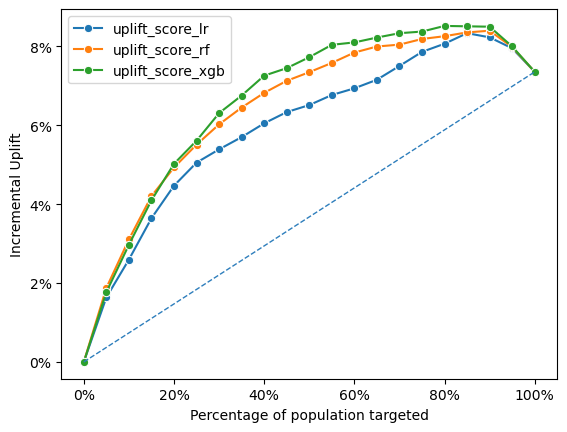

In [109]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"), "converted", "yes", ["uplift_score_lr", "uplift_score_rf", "uplift_score_xgb"], "ad", 1, qnt=20
)

# Part II: Targeting the optimal percent of customers

So far we have targeted 25% of model-selected customers by picking the best 30,000 
out of the set of 120,000 customers. Determine if more or less than 25% of customers 
should be targeted. 

## 1. What formula would you use to select customers to target using a propensity model if your goal is to maximize profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on the propensity model?

We will calculate a break-even point using the following formula:
`break-even = cost / margin`

Then we compare it to the probability of conversion calculated from the propensity model to decide on the percentage of customers to target.

In [110]:
# calculate the break-even 
break_even = cost / margin

# print a sentence with the result
print(f"The break-even response rate is {break_even:.2%}")

The break-even response rate is 10.01%


In [111]:
# create column for "propensity_target" where the value is 1 if the "pred_treatment_lr" is greater than the break-even, and 0 otherwise
cg_rct_stacked["propensity_target_lr"] = np.where(cg_rct_stacked["pred_treatment_lr"] > break_even, 1, 0)

In [112]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
propensity_target_lr = cg_rct_stacked.query("ad == 1 & training == 0")["propensity_target_lr"].mean()
propensity_target_lr

# print the result
print(f"The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the logistic propensity model is {propensity_target_lr:.2%}")

The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the logistic propensity model is 47.99%


## 2.  What formula would you use to select customers to target using an uplift model if your goal is to maximize incremental profits? What percentage of customers in the ad treatment test set in cg_rct_stacked would you target based on the uplift model?

Again, we will calculate a break-even point using the following formula:
`break-even = cost / margin`

Then we compare it to the probability of conversion calculated from the uplift model to decide on the percentage of customers to target.

In [113]:
cg_rct_stacked["uplift_target_lr"] = np.where(cg_rct_stacked["uplift_score_lr"] > break_even, 1, 0)

In [114]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
uplift_target_lr = cg_rct_stacked.query("ad == 1 & training == 0")["uplift_target_lr"].mean()
uplift_target_lr

# print the result
print(f"The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the logistic uplift model is {uplift_target_lr:.2%}")

The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the logistic uplift model is 21.93%


## 3.  Rounding the targeting percentage numbers you calculated in 1. and 2. to the nearest 5%, use the uplift table you created for the propensity and uplift models in Part I to calculate the incremental profits you would have obtained in the test set in cg_rct_stacked dataset if you had targeted the optimal percentage of customers suggested by each model.

In [115]:
# round propensity_target to the nearest 5%
propensity_target_lr_rounded = round(propensity_target_lr * 20) / 20

# round uplift_target to the nearest 5%
uplift_target_lr_rounded = round(uplift_target_lr * 20) / 20

# print the result of the rounding
print(f"The rounded percentage of customers to target based on the logistic propensity model is {propensity_target_lr_rounded:.2%}")
print(f"The rounded percentage of customers to target based on the logistic uplift model is {uplift_target_lr_rounded:.2%}")

The rounded percentage of customers to target based on the logistic propensity model is 50.00%
The rounded percentage of customers to target based on the logistic uplift model is 20.00%


In [117]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_propensity_lr["incremental_resp"].iloc[9]
T_n = tab_propensity_lr["T_n"].iloc[9]

# calculate the incremental profit 
incremental_profit_propensity_lr_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the logistic propensity model by targeting the best {propensity_target_lr_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_propensity_lr_optimal:.2f}")
print(f"The incremental profit we could have obtained using the logistic propensity model by targeting the best {propensity_target_lr_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_propensity_lr_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the logistic propensity model by targeting the best 50% of the 9,000 customers is $59.99
The incremental profit we could have obtained using the logistic propensity model by targeting the best 50% of the 120,000 customers is $799.86


In [118]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_uplift_lr["incremental_resp"].iloc[3]
T_n = tab_uplift_lr["T_n"].iloc[3]

# calculate the incremental profit 
incremental_profit_uplift_lr_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the logistic uplift model by targeting the best {uplift_target_lr_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_uplift_lr_optimal:.2f}")
print(f"The incremental profit we could have obtained using the logistic uplift model by targeting the best {uplift_target_lr_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_uplift_lr_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the logistic uplift model by targeting the best 20% of the 9,000 customers is $3329.08
The incremental profit we could have obtained using the logistic uplift model by targeting the best 20% of the 120,000 customers is $44387.75


## 4.  Repeat steps 1-4 based on predictions from the Random Forest model 

### 4.1. Targeting Percentage Using Propensity Random Forest Model

In [119]:
# create column for "propensity_target_rf" where the value is 1 if the "pred_treatment_rf" is greater than the break-even, and 0 otherwise
cg_rct_stacked["propensity_target_rf"] = np.where(cg_rct_stacked["pred_treatment_rf"] > break_even, 1, 0)

In [120]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
propensity_target_rf = cg_rct_stacked.query("ad == 1 & training == 0")["propensity_target_rf"].mean()
propensity_target_rf

# print the result
print(f"The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the random forests propensity model is {propensity_target_rf:.2%}")

The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the random forests propensity model is 50.91%


### 4.2. Targeting Percentage Using Uplift Random Forest Model

In [121]:
cg_rct_stacked["uplift_target_rf"] = np.where(cg_rct_stacked["uplift_score_rf"] > break_even, 1, 0)

In [122]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
uplift_target_rf = cg_rct_stacked.query("ad == 1 & training == 0")["uplift_target_rf"].mean()
uplift_target_rf

# print the result
print(f"The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the random forests uplift model is {uplift_target_rf:.2%}")

The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the random forests uplift model is 30.50%


### 4.3. Optimal Incremental Profits Using Random Forest Models

In [123]:
# round propensity_target to the nearest 5%
propensity_target_rf_rounded = round(propensity_target_rf * 20) / 20

# round uplift_target to the nearest 5%
uplift_target_rf_rounded = round(uplift_target_rf * 20) / 20

# print the result of the rounding
print(f"The rounded percentage of customers to target based on the random forests propensity model is {propensity_target_rf_rounded:.2%}")
print(f"The rounded percentage of customers to target based on the random forests uplift model is {uplift_target_rf_rounded:.2%}")

The rounded percentage of customers to target based on the random forests propensity model is 50.00%
The rounded percentage of customers to target based on the random forests uplift model is 30.00%


In [124]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_propensity_rf["incremental_resp"].iloc[9]
T_n = tab_propensity_rf["T_n"].iloc[9]

# calculate the incremental profit 
incremental_profit_propensity_rf_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the random forests propensity model by targeting the best {propensity_target_rf_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_propensity_rf_optimal:.2f}")
print(f"The incremental profit we could have obtained using the random forests propensity model by targeting the best {propensity_target_rf_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_propensity_rf_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the random forests propensity model by targeting the best 50% of the 9,000 customers is $1236.80
The incremental profit we could have obtained using the random forests propensity model by targeting the best 50% of the 120,000 customers is $16490.72


In [126]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_uplift_rf["incremental_resp"].iloc[5]
T_n = tab_uplift_rf["T_n"].iloc[5]

# calculate the incremental profit 
incremental_profit_uplift_rf_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the random forests uplift model by targeting the best {uplift_target_rf_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_uplift_rf_optimal:.2f}")
print(f"The incremental profit we could have obtained using the random forests uplift model by targeting the best {uplift_target_rf_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_uplift_rf_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the random forests uplift model by targeting the best 30% of the 9,000 customers is $4081.53
The incremental profit we could have obtained using the random forests uplift model by targeting the best 30% of the 120,000 customers is $54420.37


## 5. Repeat steps 1-4 based on predictions from the XGBoost model

### 5.1. Targeting Percentage Using Propensity XGBoost Model

In [127]:
# create column for "propensity_target_xgb" where the value is 1 if the "pred_treatment_xgb" is greater than the break-even, and 0 otherwise
cg_rct_stacked["propensity_target_xgb"] = np.where(cg_rct_stacked["pred_treatment_xgb"] > break_even, 1, 0)

In [128]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
propensity_target_xgb = cg_rct_stacked.query("ad == 1 & training == 0")["propensity_target_xgb"].mean()
propensity_target_xgb

# print the result
print(f"The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the XGBoost propensity model is {propensity_target_xgb:.2%}")

The percentage of of customers in the ad treatment test set in cg_rct_stacked we would target based on the XGBoost propensity model is 48.27%


### 5.2. Targeting Percentage Using Uplift XGBoost Model

In [129]:
cg_rct_stacked["uplift_target_xgb"] = np.where(cg_rct_stacked["uplift_score_xgb"] > break_even, 1, 0)

In [130]:
# calculate percentage of propensity_target that are 1 in the test treatment group (ad = 1 and training = 0)
uplift_target_xgb = cg_rct_stacked.query("ad == 1 & training == 0")["uplift_target_xgb"].mean()
uplift_target_xgb

# print the result
print(f"The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the XGBoost uplift model is {uplift_target_xgb:.2%}")

The percentage of customers in the ad treatment test set in cg_rct_stacked we would target based on the XGBoost uplift model is 28.26%


### 5.3. Optimal Incremental Profits Using XGBoost Models

In [132]:
# round propensity_target to the nearest 5%
propensity_target_xgb_rounded = round(propensity_target_xgb * 20) / 20

# round uplift_target to the nearest 5%
uplift_target_xgb_rounded = round(uplift_target_xgb * 20) / 20

# print the result of the rounding
print(f"The rounded percentage of customers to target based on the XGBoost propensity model is {propensity_target_xgb_rounded:.2%}")
print(f"The rounded percentage of customers to target based on the XGBoost uplift model is {uplift_target_xgb_rounded:.2%}")

The rounded percentage of customers to target based on the XGBoost propensity model is 50.00%
The rounded percentage of customers to target based on the XGBoost uplift model is 30.00%


In [133]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_propensity_xgb["incremental_resp"].iloc[9]
T_n = tab_propensity_xgb["T_n"].iloc[9]

# calculate the incremental profit 
incremental_profit_propensity_xgb_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the XGBoost propensity model by targeting the best {propensity_target_xgb_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_propensity_xgb_optimal:.2f}")
print(f"The incremental profit we could have obtained using the XGBoost propensity model by targeting the best {propensity_target_xgb_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_propensity_xgb_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the XGBoost propensity model by targeting the best 50% of the 9,000 customers is $1394.52
The incremental profit we could have obtained using the XGBoost propensity model by targeting the best 50% of the 120,000 customers is $18593.64


In [134]:
# get the value of incremental_resp for the related percentile
incremental_resp = tab_uplift_xgb["incremental_resp"].iloc[5]
T_n = tab_uplift_xgb["T_n"].iloc[5]

# calculate the incremental profit 
incremental_profit_uplift_xgb_optimal = (incremental_resp * margin - (T_n * cost))

# print a sentence with the result
print(f"The incremental profit we could have obtained using the XGBoost uplift model by targeting the best {uplift_target_xgb_rounded*100:.0f}% of the 9,000 customers is ${incremental_profit_uplift_xgb_optimal:.2f}")
print(f"The incremental profit we could have obtained using the XGBoost uplift model by targeting the best {uplift_target_xgb_rounded*100:.0f}% of the 120,000 customers is ${incremental_profit_uplift_xgb_optimal*(120000/9000):.2f}")

The incremental profit we could have obtained using the XGBoost uplift model by targeting the best 30% of the 9,000 customers is $4461.09
The incremental profit we could have obtained using the XGBoost uplift model by targeting the best 30% of the 120,000 customers is $59481.21


In [142]:
# print the results of all the incremental profits in a table (optimal targeting for 9K customers and 120K), rounding to the decimal places
pd.DataFrame({
    "Model": ["Logistic Propensity", "Logistic Uplift", "Random Forests Propensity", "Random Forests Uplift", "XGBoost Propensity", "XGBoost Uplift"],
    "Incremental Profit (Optimal targeting for 9K)": [
        f"${incremental_profit_propensity_lr_optimal:.2f}", 
        f"${incremental_profit_uplift_lr_optimal:.2f}", 
        f"${incremental_profit_propensity_rf_optimal:.2f}", 
        f"${incremental_profit_uplift_rf_optimal:.2f}", 
        f"${incremental_profit_propensity_xgb_optimal:.2f}", 
        f"${incremental_profit_uplift_xgb_optimal:.2f}"
    ],
    "Incremental Profit (Optimal targeting for 120K)": [
        f"${incremental_profit_propensity_lr_optimal*(120000/9000):.2f}", 
        f"${incremental_profit_uplift_lr_optimal*(120000/9000):.2f}", 
        f"${incremental_profit_propensity_rf_optimal*(120000/9000):.2f}", 
        f"${incremental_profit_uplift_rf_optimal*(120000/9000):.2f}", 
        f"${incremental_profit_propensity_xgb_optimal*(120000/9000):.2f}", 
        f"${incremental_profit_uplift_xgb_optimal*(120000/9000):.2f}"
    ],
    "Incremental Profit (Targeting best 30K of 120K)": [
        f"${incremental_profit_propensity_lr:.2f}",
        f"${incremental_profit_uplift_lr:.2f}",
        f"${incremental_profit_propensity_rf:.2f}",
        f"${incremental_profit_uplift_rf:.2f}",
        f"${incremental_profit_propensity_xgb:.2f}",
        f"${incremental_profit_uplift_xgb:.2f}"
    ]
})


,Model,Incremental Profit (Optimal targeting for 9K),Incremental Profit (Optimal targeting for 120K),Incremental Profit (Targeting best 30K of 120K)
0,Logistic Propensity,$59.99,$799.86,$32065.48
1,Logistic Uplift,$3329.08,$44387.75,$45907.76
2,Random Forests Propensity,$1236.80,$16490.72,$46531.42
3,Random Forests Uplift,$4081.53,$54420.37,$54111.89
4,XGBoost Propensity,$1394.52,$18593.64,$42553.36
5,XGBoost Uplift,$4461.09,$59481.21,$55910.95


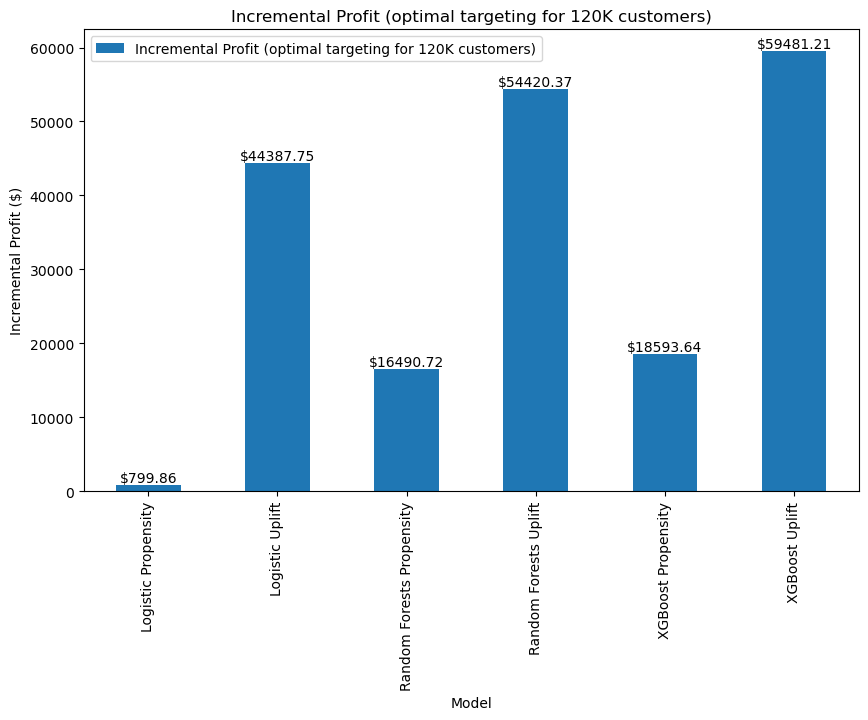

In [139]:
# plot the results of incremental Profit (optimal targeting for 120K customers). Add the model names as labels. also add the values.
fig, ax = plt.subplots(figsize=(10, 6))
pd.DataFrame({
    "Incremental Profit (optimal targeting for 120K customers)": [
        incremental_profit_propensity_lr_optimal*(120000/9000), 
        incremental_profit_uplift_lr_optimal*(120000/9000), 
        incremental_profit_propensity_rf_optimal*(120000/9000), 
        incremental_profit_uplift_rf_optimal*(120000/9000), 
        incremental_profit_propensity_xgb_optimal*(120000/9000), 
        incremental_profit_uplift_xgb_optimal*(120000/9000)
    ]
}, index=["Logistic Propensity", "Logistic Uplift", "Random Forests Propensity", "Random Forests Uplift", "XGBoost Propensity", "XGBoost Uplift"]).plot(kind="bar", ax=ax)
ax.set_ylabel("Incremental Profit ($)")
ax.set_xlabel("Model")
ax.set_title("Incremental Profit (optimal targeting for 120K customers)")
for i, v in enumerate([
        incremental_profit_propensity_lr_optimal*(120000/9000), 
        incremental_profit_uplift_lr_optimal*(120000/9000), 
        incremental_profit_propensity_rf_optimal*(120000/9000), 
        incremental_profit_uplift_rf_optimal*(120000/9000), 
        incremental_profit_propensity_xgb_optimal*(120000/9000), 
        incremental_profit_uplift_xgb_optimal*(120000/9000)
    ]):
    ax.text(i, v, f"${v:.2f}", ha="center", va="bottom")
plt.show()

## 6.  Give two reasons why one model performs better than the other on incremental profit when the optimal percentage of customers is selected for each model

### 1. **Model Complexity and Feature Interactions**

- **Logistic Regression** is a linear model that assumes a linear relationship between the input features and the target variable. Its performance might be limited in scenarios where the relationship between features and the target is complex or nonlinear.

- **Random Forests** and **XGBoost** are ensemble models that can capture complex patterns and interactions between features. Random Forests does this through averaging the decisions of multiple decision trees that individually consider random subsets of features and samples, making it robust against overfitting and capable of modeling more complex relationships than logistic regression. XGBoost, a gradient boosting framework, builds trees sequentially to correct the errors of previous trees, further refining its predictions. This method can be especially powerful in capturing intricate feature interactions that logistic regression might miss.

    **Result**: In cases where the data contains complex, nonlinear relationships or interactions among features, Random Forests and XGBoost are more likely to outperform logistic regression, potentially leading to better segmentation of customers and, consequently, higher incremental profits when targeting the optimal percentage of customers.

### 2. **Model Robustness and Overfitting**

- **Overfitting Control**: Logistic regression, with fewer parameters, is less prone to overfitting compared to more complex models. However, it might underfit complex datasets. Random Forests and XGBoost have mechanisms to control overfitting (such as tree depth, learning rate for XGBoost, and the number of trees), but they require careful tuning to avoid fitting too closely to the training data.

- **Generalization Ability**: The ability of a model to generalize well to unseen data is crucial for its performance on incremental profit. XGBoost, with features like regularization and gradient boosting, is designed to generalize well if properly tuned. Random Forests, through its ensemble approach, also generalizes well by reducing variance.

    **Result**: The effectiveness of these models in controlling overfitting and their ability to generalize can impact their performance on incremental profits. Properly tuned, Random Forests and XGBoost might capture complex patterns without overfitting, leading to better performance on unseen data and, thus, more effective selection of an optimal percentage of customers for maximizing incremental profit.

# Part III: Generative AI
 
Please describe in detail how your team used Generative AI-tools like ChatGPT to support your work on this case. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Make sure to add discussion about your thought process and how you tried to maximize the benefits from using these tools. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class. 
 
Note: No matter how you used Generative AI-tools, you are expected to fully understand all elements of the case solution submitted by your group. Any group member may be called on in class to walk us through your thought process and how different parts of your code work and how you arrived at your solution.

Links to ChatGPT discussions:
- https://chat.openai.com/share/f38b36c2-7939-446f-ba34-cb6b1ccfdef3
- https://chat.openai.com/c/117a91cc-e4da-4de9-8693-cb9e304fe997
- https://chat.openai.com/c/4357e57e-38cc-40b4-b3a9-4ddda409e2ee
- https://chat.openai.com/c/a1c6b1fe-0b68-463e-aeca-4cb6b75ee3ae
- https://chat.openai.com/share/2ae0daa2-7942-49da-b925-519aeff86aff
- https://chat.openai.com/share/44f974ff-9a0d-48b8-87d6-5958c959bd7c

During our collaborative analysis, we utilized ChatGPT in various ways to support and enhance our work on this case study involving the comparison of propensity and uplift models. Below is a detailed account of how ChatGPT was leveraged, the successes and challenges encountered, and our collective thought process aimed at maximizing the tool's benefits.

**Utilization of ChatGPT:**

1. **Data Interpretation**: We engaged ChatGPT to interpret complex datasets and draw conclusions from tabular data. This involved translating quantitative findings from the data tables into qualitative insights that could inform marketing decisions.

2. **Model Comparison**: ChatGPT was used to compare the performance of the propensity model and the uplift model, focusing on identifying "persuadables" and understanding the impact on incremental uplift percentages.

3. **Visual Analysis**: We employed ChatGPT to interpret graphical data, specifically incremental uplift plots. ChatGPT provided detailed interpretations of the plots, which was instrumental in understanding the models' performances across different population segments.

4. **Conceptual Clarification**: ChatGPT helped clarify key concepts such as "persuadables," "sure things," and "do-not-disturbs," which are essential for understanding uplift modeling in targeted marketing.

5. **Strategic Guidance**: We used ChatGPT to discuss strategic implications of the models and the importance of cutoff points in targeting to maximize marketing effectiveness and efficiency.

**What Went Well:**

- **Expert-Level Insights**: ChatGPT offered expert-level analysis on the models' performance, providing nuanced insights that mirrored the thought process of a data analyst.
  
- **Responsive Analysis**: The tool was responsive to data provided, adjusting interpretations as new information was presented, which facilitated a dynamic analytical process.
  
- **Strategic Recommendations**: ChatGPT successfully translated data insights into strategic recommendations, a valuable aspect of decision support systems.

**Challenges Encountered:**

- **Data Misinterpretation**: Initially, there were instances where ChatGPT misinterpreted the data, particularly in linking the correct columns from the tables to the uplift plots. This required clarification and reiteration of the correct data points to use.

- **Visualization Limitations**: While ChatGPT could interpret the plots conceptually, it could not visually analyze the images directly, which meant relying on descriptions and provided data rather than direct analysis of visual content.

- **Interactive Dialogue**: At times, the iterative nature of the dialogue required to refine the analysis and correct misunderstandings could lead to a longer process than perhaps working with a live analyst.

**Thought Process and Maximizing Benefits from ChatGPT:**

- **Clarifying Questions**: We aimed to ask clear and direct questions to minimize misunderstandings and ensure that the responses were as relevant and accurate as possible.

- **Iterative Feedback**: By providing iterative feedback on ChatGPT's responses, we refined the accuracy and relevance of the information received, enhancing the quality of our analysis.

- **Leveraging ChatGPT's Strengths**: We focused on utilizing ChatGPT for tasks that align with its capabilities, such as explaining complex concepts and providing data-driven insights.

**Potential Questions About the Support Received:**

1. How can we further improve the accuracy of ChatGPT's data interpretation to reduce the need for iterative clarification?
   
2. What steps can we take to ensure that ChatGPT better understands and retains the context of the discussion throughout an extended conversation?
   
3. Are there best practices for structuring questions and information to maximize the effectiveness of ChatGPT's analytical support?